In [1]:
%reset -f
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
import random
import time
import math

almNum = 3
ocorr = 10
t_sample = 60
base_hour = dt.datetime(2018, 1,9,9,0,0)
occor_num = 0

#Settings alarms
a = np.zeros(1, dtype=int)
duration = 120 #120sec
hour_init = base_hour

b = np.zeros(1, dtype=int)
pAb = 1
delay_b = 120#seconds
duration_b =120

c = np.zeros(1, dtype=int)
pAc = 1
delay_c = 120#seconds
duration_c = 120

#Alarm Series Generation, A (cause), B(Effect). C(Effect)
while(occor_num < ocorr): 
    #A generation - begin
    srtd_hour = random.normalvariate(3, 1)
    srtd_hour_begin = hour_init + dt.timedelta(hours=srtd_hour)
    srtd_hour_end = srtd_hour_begin + dt.timedelta(seconds = duration)

    idx_init_a_occor = int(math.ceil((srtd_hour_begin - base_hour).total_seconds()/t_sample))
    idx_end_a_occor = int(math.ceil((srtd_hour_end - base_hour).total_seconds()/t_sample))
        
    if(idx_end_a_occor > a.size):
            a.resize(idx_end_a_occor)

    for i in np.arange(idx_init_a_occor, idx_end_a_occor + 1):
        a[i-1] = 1
    #A generation - end
         
    
    #B generation begin
    srtd_prob_b = random.uniform(0,1)  
    if srtd_prob_b <= pAb:
        srtd_hour_begin_b = srtd_hour_begin + dt.timedelta(seconds = delay_b)
        srtd_hour_end_b = srtd_hour_begin_b + dt.timedelta(seconds=duration_b)

        idx_init_b_occor = int(math.ceil((srtd_hour_begin_b - base_hour).total_seconds()/t_sample))
        idx_end_b_occor = int(math.ceil((srtd_hour_end_b - base_hour).total_seconds()/t_sample))

        if(idx_end_b_occor > b.size):
                b.resize(idx_end_b_occor)

        for j in np.arange(idx_init_b_occor, idx_end_b_occor +1):
            b[j-1] =  1  
    #B generation end

    #C generation begin
    srtd_prob_c = random.uniform(0,1)
    if srtd_prob_c <= pAc:
        srtd_hour_begin_c = srtd_hour_begin + dt.timedelta(seconds = delay_c)
        srtd_hour_end_c = srtd_hour_begin_c + dt.timedelta(seconds=duration_c)

        idx_init_c_occor = int(math.ceil((srtd_hour_begin_c - base_hour).total_seconds()/t_sample))
        idx_end_c_occor = int(math.ceil((srtd_hour_end_c - base_hour).total_seconds()/t_sample))
        
        if(idx_end_c_occor > c.size):
            c.resize(idx_end_c_occor)

        for j in np.arange(idx_init_c_occor, idx_end_c_occor +1):
            c[j-1] = 1    
    #C generation end
    
    hour_init = srtd_hour_begin
    occor_num = occor_num + 1

#Making series the same length
max_len = max(a, b, c, key=len).size
a = np.concatenate([a, np.zeros(max_len - a.size)])
b = np.concatenate([b, np.zeros(max_len - b.size)])
c = np.concatenate([c, np.zeros(max_len - c.size)])
sum(c)

30.0

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
import random
import time
import itertools
import math

In [2]:
def plot_mat_corrs(figsize, annot, matrix):
    f, ax = plt.subplots(figsize=figsize)
    cmap = sns.diverging_palette(150, 275, s=80, l=55, as_cmap=True)
    sns.heatmap(matrix, cmap=cmap, center=0, annot=annot)
    plt.yticks(rotation=45)
    plt.xticks(rotation=45)
    plt.show()

In [3]:
#guess window_lag = ceil(delay_b_c/t_sample)

def interrelation(window_lag, matrix):
    #window_lag =  5#shoud be minor than size of the series

    print(matrix.shape)
    count_occor = 0;
    corr_mat = np.zeros([matrix.shape[1],matrix.shape[1]], dtype=float)
    alrms = {}
    for i in np.arange(0, matrix.shape[1]):
        alrms[i] = matrix[:,i]
    #print(alrms)
    for idx_caus, value in alrms.items():
        reduced_alarms = alrms.copy()
        del reduced_alarms[idx_caus]
        for idx_occor_caus, occor in enumerate(value):
            if occor == 1:
                if(idx_occor_caus+window_lag < len(value)):
                    count_occor = count_occor + 1
                    for idx_fct, alm_redu in reduced_alarms.items():
                        counted = False
                        for idx_occor_fct in np.arange(idx_occor_caus+1, idx_occor_caus+1+window_lag):
                            if alm_redu[idx_occor_fct] == 1 and  not counted:
                                counted = True
                                corr_mat[idx_caus][idx_fct] = corr_mat[idx_caus][idx_fct]+1
        if count_occor > 0: 
            corr_mat[idx_caus] = corr_mat[idx_caus]/count_occor
            count_occor = 0
    return corr_mat

In [5]:
#plot_mat_corrs(figsize=(30,20), annot=True, matrix=corr)

In [68]:

dist6 = pd.read_csv('dist6.csv', names=['xmeas%02d_low' % x for x in range(1, 74)] + ['xmeas%02d_high' % x for x in range(1, 74)])
dist6_sel_vars = dist6[ ['xmeas01_low', 'xmeas02_low', 'xmeas03_low', 
        'xmeas08_low', 'xmeas09_low', 'xmeas21_low',
        'xmeas01_high', 'xmeas02_high', 'xmeas03_high',
        'xmeas08_high', 'xmeas09_high', 'xmeas21_high']].copy()


In [69]:
dist6_first_diff = dist6_sel_vars.diff(1)
dist6_first_diff.iloc[0] = dist6_sel_vars.iloc[0]

corr = interrelation(100, dist6_first_diff.as_matrix())

(51201, 12)


In [70]:
df_cors = pd.DataFrame(corr, columns= ['xmeas01_low', 'xmeas02_low', 'xmeas03_low', 
        'xmeas08_low', 'xmeas09_low', 'xmeas21_low',
        'xmeas01_high', 'xmeas02_high', 'xmeas03_high',
        'xmeas08_high', 'xmeas09_high', 'xmeas21_high'], 
        
        index=['xmeas01_low', 'xmeas02_low', 'xmeas03_low', 
        'xmeas08_low', 'xmeas09_low', 'xmeas21_low',
        'xmeas01_high', 'xmeas02_high', 'xmeas03_high',
        'xmeas08_high', 'xmeas09_high', 'xmeas21_high'])
df_cors

,xmeas01_low,xmeas02_low,xmeas03_low,xmeas08_low,xmeas09_low,xmeas21_low,xmeas01_high,xmeas02_high,xmeas03_high,xmeas08_high,xmeas09_high,xmeas21_high
xmeas01_low,0.000000,0.302632,0.710526,0.907895,0.171053,0.986842,0.000000,0.026316,0.000000,0.013158,0.013158,0.013158
xmeas02_low,0.059322,0.000000,0.364407,0.169492,0.271186,0.203390,0.050847,0.042373,0.110169,0.500000,0.127119,0.457627
xmeas03_low,0.296537,0.177489,0.000000,0.467532,0.192641,0.707792,0.038961,0.084416,0.004329,0.192641,0.043290,0.097403
xmeas08_low,0.423826,0.116032,0.664748,0.000000,0.196634,0.532329,0.165190,0.198406,0.045173,0.002657,0.067759,0.001329
xmeas09_low,0.023810,0.116071,0.151786,0.151786,0.000000,0.151786,0.375000,0.223214,0.523810,0.845238,0.434524,0.369048
xmeas21_low,0.131167,0.321300,0.675090,0.510229,0.152828,0.000000,0.012034,0.066185,0.120337,0.074609,0.161252,0.022864
xmeas01_high,0.291667,0.069444,0.222222,0.361111,0.236111,0.763889,0.000000,0.347222,0.708333,0.708333,0.708333,0.708333
xmeas02_high,0.064706,0.011765,0.170588,0.764706,0.264706,0.258824,0.111765,0.000000,0.488235,0.170588,0.341176,0.170588
xmeas03_high,0.000000,0.009812,0.004088,0.558463,0.200327,0.544563,0.094031,0.443173,0.000000,0.349959,0.762878,0.409648
xmeas08_high,0.000000,0.058224,0.015725,0.082023,0.626009,0.319592,0.540161,0.327667,0.868253,0.000000,0.802805,0.639184


In [73]:
g = Digraph()
for k, col in enumerate(df_cors.columns): 
    g.node(str(k+1),col)

for j, col in enumerate(df_cors.columns):
    for i, row in enumerate(df_cors[col]):
        if row > 0.6:
            g.edge(str(i+1), str(j+1), label=str(row))
    
    

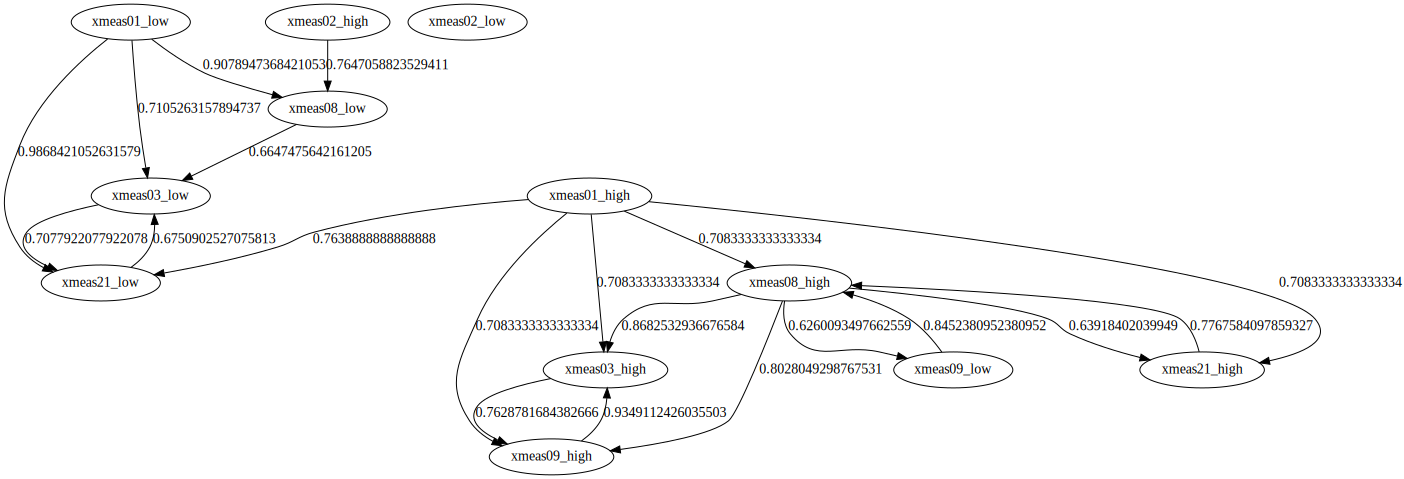

In [74]:
g

In [20]:
df_cors['xmeas01_low'][0]


0.0

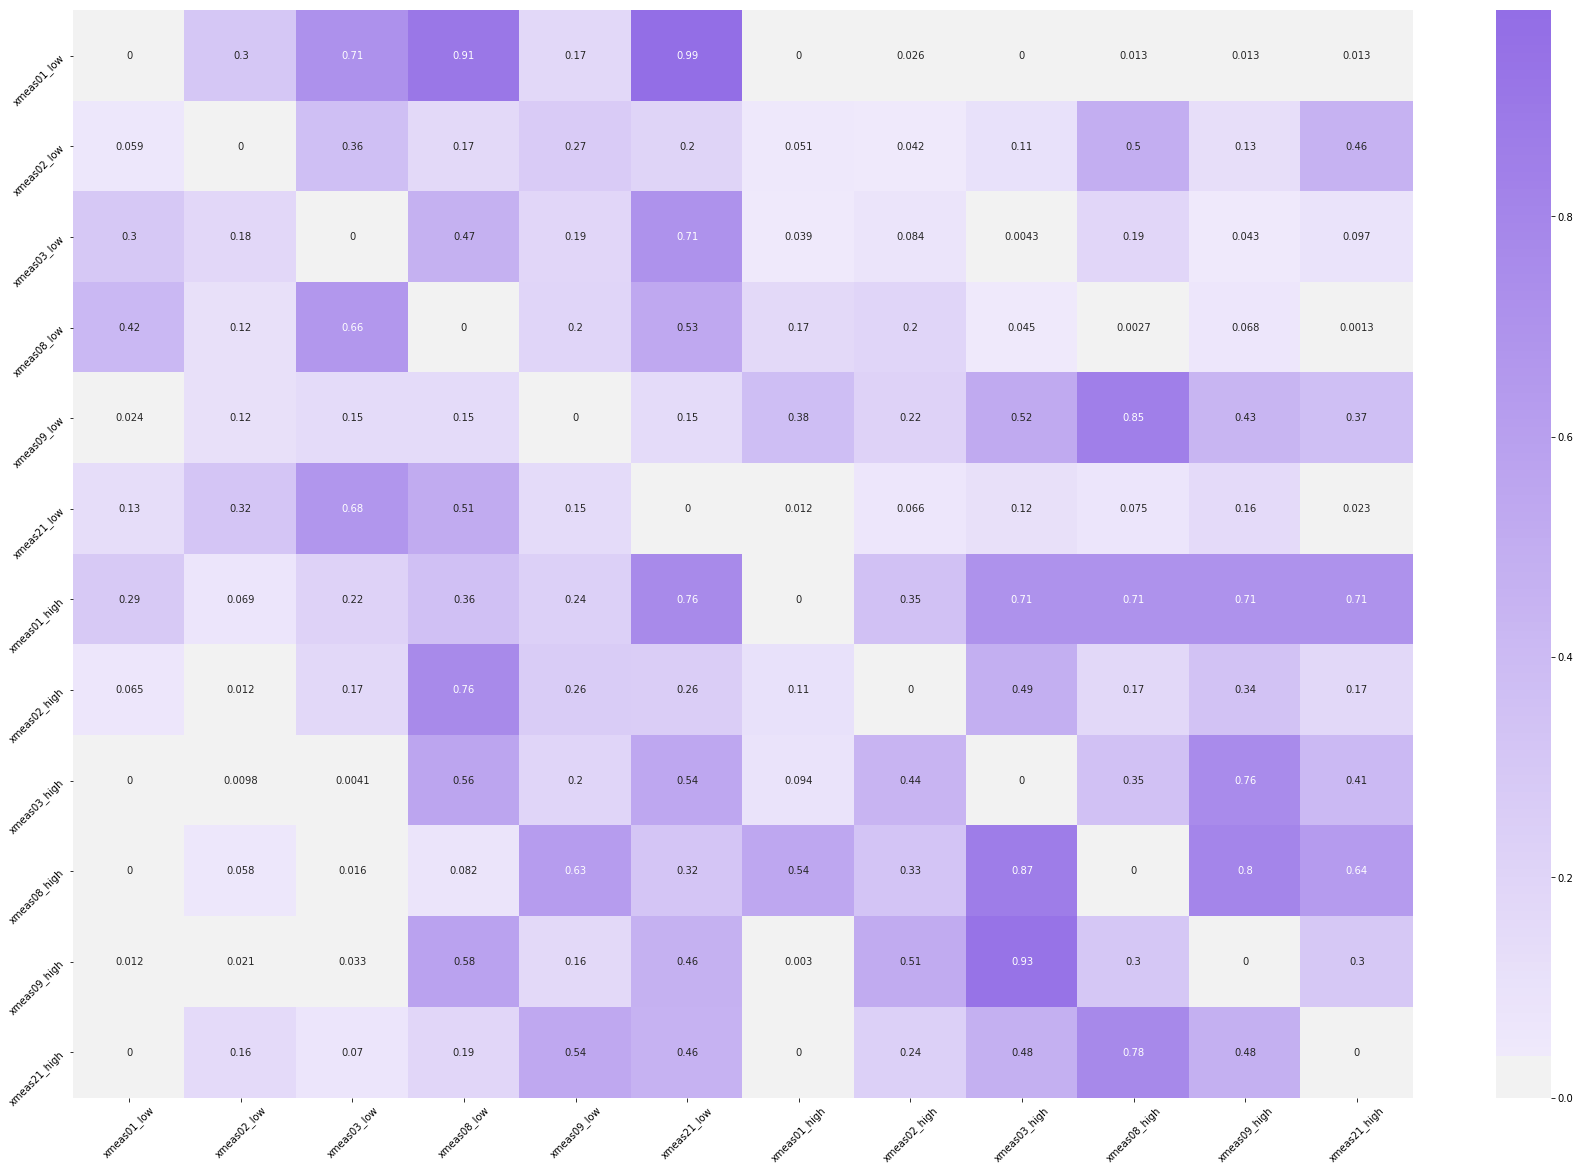

In [75]:
plot_mat_corrs(figsize=(30,20), annot=True, matrix=df_cors)

In [25]:
from graphviz import Digraph
a = Digraph()
a.node('1', 'xmeas1')
a.node('2', 'xmeas2')
a.node('3', 'xmeas3')
a.edges(['11', '21'])

a.edge('1','2', label='a')

<bound method Dot.node of <graphviz.dot.Digraph object at 0x7f27ac22e710>>

In [83]:
a = df_cors['xmeas01_low'].astype(int)
a[0]

0

In [ ]:
relations